# Basic Analysis of the data

In [1]:
#Impoerting pandas library
import pandas as pd

In [2]:
#Loading the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [13]:
#View the shape of the data
df.shape

(150, 5)

In [3]:
#View the data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Splitting data into X & y

In [4]:
#Splitting data into X & y
X = df.drop(columns='target',axis = 1)
y = df['target']

# Standardization of the data

In [5]:
#Impoerting standard Scaler library
from sklearn.preprocessing import StandardScaler

In [6]:
#Implementing standardization on X data
sc = StandardScaler() #Calling the standard scaler function
sc.fit(X) #Fitting on the data
X = sc.transform(X) #Converting data into standardization

In [7]:
#Converting numpy array into data frame
X = pd.DataFrame(X,columns=['sepal length','sepal width','petal length','petal width'])

In [8]:
#View the data
X

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


# Principal Component Analysis

In [9]:
#Importing library for PCA
    from sklearn.decomposition import PCA

In [10]:
#Implementing PCA
pca = PCA(n_components=2) #Calling PCA function with 2 components
principalComponents = pca.fit(X) #Fitting PCA on the data
principalComponents = pca.transform(X) #Applying PCA

In [11]:
#View the PCA data
principalComponents

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [14]:
#Converting PCA numpy array into data frame
pdf = pd.DataFrame(principalComponents, columns=['PCA1','PCA2'])

In [15]:
#View the data
pdf

,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [16]:
#Concatenating PCA data with target variable
final_pdf = pd.concat([pdf, df[['target']]],axis = 1) 

In [21]:
df['target'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: target, dtype: int64

In [33]:
#View the data
final_pdf

,PCA1,PCA2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


# Visualization of PCA

In [17]:
#Importing matplotlib library
import matplotlib.pyplot as plt

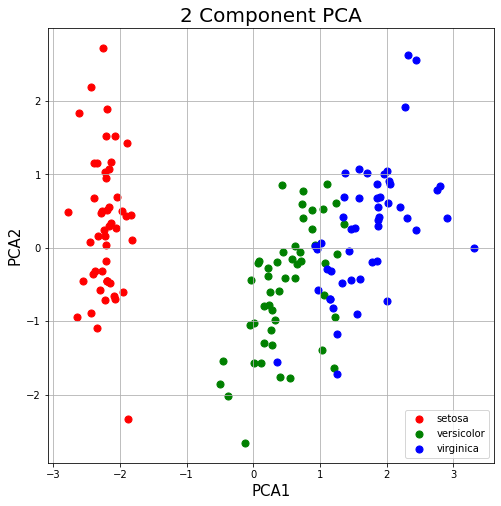

In [40]:
#Creating plot
fig = plt.figure(figsize=(8,8)) #Fixing the size of the plot

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1', fontsize = 15) # name of X axis
ax.set_ylabel('PCA2', fontsize = 15) #name of Y axis
ax.set_title('2 Component PCA', fontsize = 20) #title of the plot

target = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # name of targets
colors = ['r','g','b'] #color of the target

for target, colors in zip(target,colors):
    indecesToKeep = final_pdf['target']== target
    ax.scatter(final_pdf.loc[indecesToKeep,'PCA1'],
               final_pdf.loc[indecesToKeep,'PCA2'],
              c = colors,
              s = 50)
ax.legend(['setosa', 'versicolor', 'virginica'])
ax.grid()


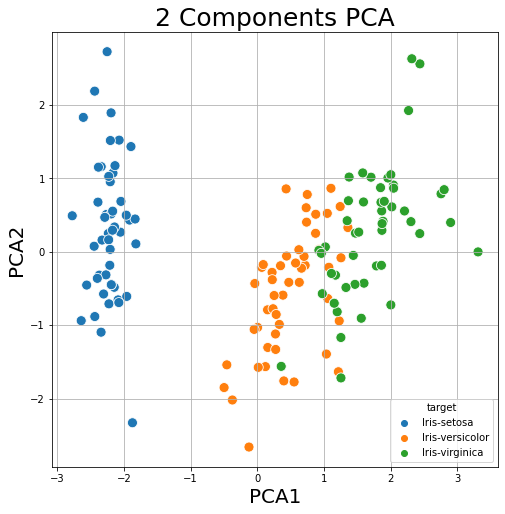

In [54]:
#Creating plot
import seaborn as sns
plt.figure(figsize=(8,8));
sns.scatterplot(x = 'PCA1',y = 'PCA2',data=final_pdf, hue='target', s =100);
plt.xlabel('PCA1', fontsize = 20);
plt.ylabel('PCA2', fontsize = 20);
plt.title('2 Components PCA', fontsize = 25);
plt.grid()

# Checking PCA summary

In [36]:
#Checking the variance ratio
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [37]:
#Checking variance in the data
pca.explained_variance_

array([2.93035378, 0.92740362])

In [38]:
#Checking components
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])